 ## Ensemble Methods

## 1. ESSENTIAL IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


## 2.  Data  Import and View

In [2]:
data = pd.read_csv("Finance.csv") 

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


https://archive.ics.uci.edu/ml/datasets/bank+marketing

## 3. Checking for Missing Values

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 4. Checking for Data Types

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 5. Apply normalization to Numeric Columns

In [6]:
num_col=[]
cat_col=[]
for col in data.columns:
    if data[col].dtype=='int64':
        num_col.append(col)
    else:
        cat_col.append(col)

In [7]:
df_num_col=data[num_col]
df_cat_col=data[cat_col]

In [8]:
from sklearn.preprocessing import StandardScaler
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_col]).round(3)
scaled = pd.DataFrame(scaled,columns=num_col)

In [9]:
df=pd.concat([df_cat_col,scaled], axis=1)

In [10]:
df

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,0.948,-0.176,0.143,2.791,0.076,-0.411,-0.252
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,2.831,0.120,0.143,0.768,-0.247,-0.411,-0.252
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,2.925,1.430,0.143,3.374,0.722,1.436,1.050
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,1.513,-0.228,0.143,0.970,0.399,-0.411,-0.252


In [11]:
data=df.copy()

## 6. Preprocessing

In [12]:
data['y'].replace(to_replace='yes', value=1, inplace=True)
data['y'].replace(to_replace='no',  value=0, inplace=True)

In [13]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,management,married,tertiary,no,yes,no,unknown,may,unknown,0,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252
1,technician,single,secondary,no,yes,no,unknown,may,unknown,0,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,0,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,0,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252
4,unknown,single,unknown,no,no,no,unknown,may,unknown,0,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252


### Encoding 

In [14]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1.607,0.256,-1.298,0.011,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0.289,-0.438,-1.298,-0.416,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,-0.747,-0.447,-1.298,-0.707,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0.571,0.047,-1.298,-0.645,-0.569,-0.411,-0.252,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,-0.747,-0.447,-1.298,-0.234,-0.569,-0.411,-0.252,0,0,...,0,0,1,0,0,0,0,0,0,1


### View Correlation 

<AxesSubplot:>

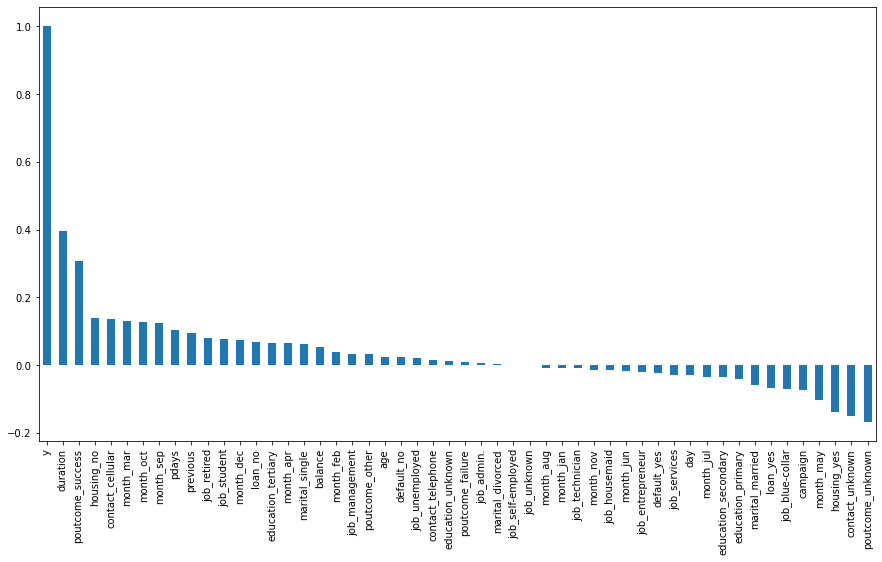

In [15]:
plt.figure(figsize=(15,8))
df_dummies.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [16]:
y = df_dummies['y'].values
X = df_dummies.drop(columns = ['y'])

## 7. Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 8. Model Fitting and Evaluation  (Random Forest)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
prediction_test = clf.predict(X_test)

## Classification Report

In [19]:
def classification_report(model):
    prediction_test = model.predict(X_test)
    # Print the prediction accuracy
    accuracy = metrics.accuracy_score(y_test, prediction_test)
    confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
    classification = metrics.classification_report(y_test, prediction_test)
    probs = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, probs)


    print('============================== Model Evaluation ==============================')
    print('Classifier :',model)
    print("\n Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print('AUC: %.3f' % auc)
   

In [20]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : RandomForestClassifier(n_estimators=200)

 Model Accuracy:
 0.9104246534945444

Confusion matrix:
 [[11675   292]
 [  923   674]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     11967
           1       0.70      0.42      0.53      1597

    accuracy                           0.91     13564
   macro avg       0.81      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564

AUC: 0.934


## Confusion Matrix

In [21]:
class_names=[1,0]
def plot_conf_matrix(y_test, prediction_test, class_names):
    cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

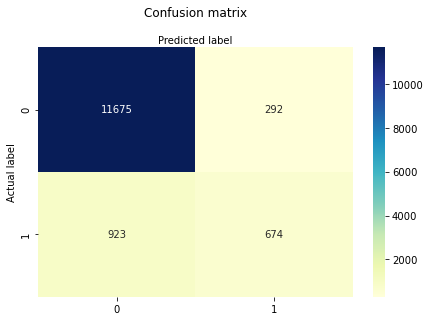

In [22]:
class_names=[0,1]
plot_conf_matrix(y_test, prediction_test, class_names)

## ROC Curve

In [23]:
def plot_roc(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='NB')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Naive Bayes ROC curve')
    plt.show()

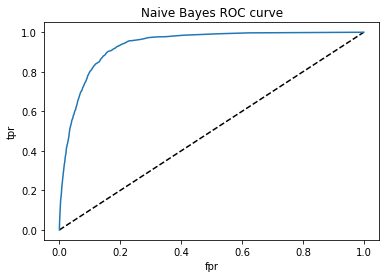

In [24]:
plot_roc(clf,X_test,y_test)

## Feature Importance using Random Forest

In [25]:
importances = clf.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.2601711994564225, 'duration'), (0.09383687355008952, 'balance'), (0.0913804086785359, 'age'), (0.08040607150545631, 'day'), (0.04825906227477356, 'poutcome_success'), (0.03879227591228663, 'campaign'), (0.03766442423409215, 'pdays'), (0.020517218216370103, 'previous'), (0.013456159224083563, 'month_mar'), (0.01335511604160226, 'month_apr'), (0.012719124738031412, 'housing_yes'), (0.01264303645213965, 'housing_no'), (0.012056746706784301, 'education_secondary'), (0.011698098548481726, 'education_tertiary'), (0.011658642689565207, 'month_jun'), (0.011012011716450491, 'marital_married'), (0.01050963678350857, 'job_management'), (0.010436046051180621, 'job_technician'), (0.010206969245960174, 'month_oct'), (0.009832243619995582, 'marital_single'), (0.009725885044392207, 'month_aug'), (0.009056148059405557, 'month_may'), (0.008935825723407426, 'poutcome_unknown'), (0.008922480127983492, 'contact_cellular'), (0.008919438056229117, 'job_admin.'), (0.008747666877

In [26]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

<AxesSubplot:>

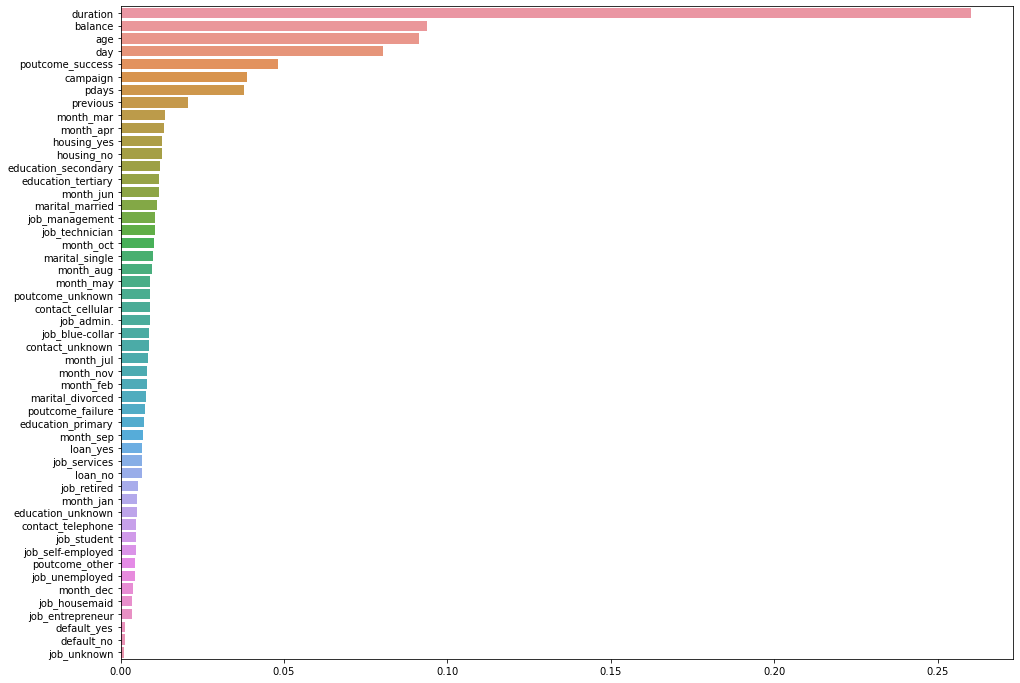

In [27]:
# Creating a bar plot
plt.figure(figsize=(16,12))
sns.barplot(x=feature_imp, y=feature_imp.index)

## Adaboost

In [28]:
from sklearn.ensemble import  AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train, y_train)
predictions_test=clf.predict(X_test)

In [29]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : AdaBoostClassifier()

 Model Accuracy:
 0.9037894426422884

Confusion matrix:
 [[11636   331]
 [  974   623]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11967
           1       0.65      0.39      0.49      1597

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564

AUC: 0.916


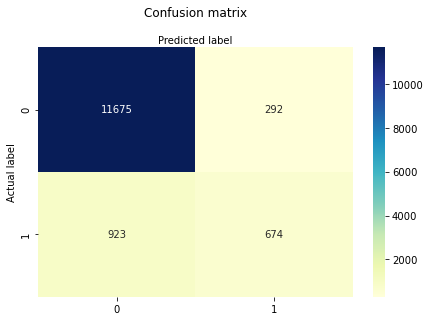

In [30]:
class_names=[0,1]
plot_conf_matrix(y_test, prediction_test, class_names)

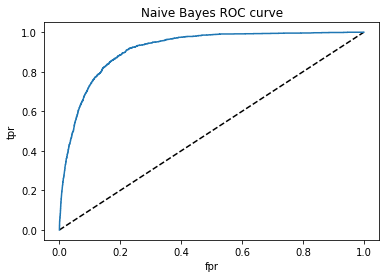

In [31]:
plot_roc(clf,X_test,y_test)

## Gradient Boosting 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train)
predictions_test=clf.predict(X_test)

In [33]:
classification_report(clf)

============================== Model Evaluation ==============================
Classifier : GradientBoostingClassifier()

 Model Accuracy:
 0.9085815393689177

Confusion matrix:
 [[11647   320]
 [  920   677]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11967
           1       0.68      0.42      0.52      1597

    accuracy                           0.91     13564
   macro avg       0.80      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564

AUC: 0.930


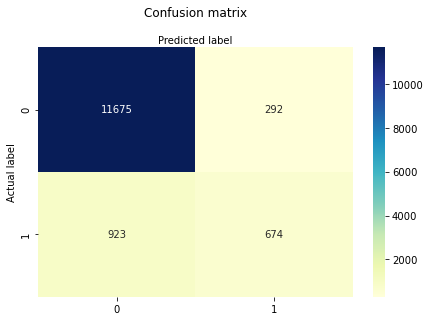

In [34]:
class_names=[0,1]
plot_conf_matrix(y_test, prediction_test, class_names)

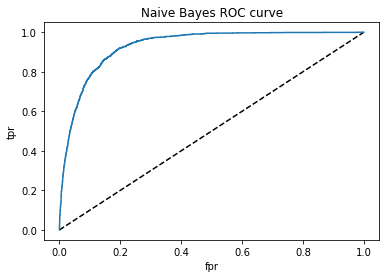

In [35]:
plot_roc(clf,X_test,y_test)